In [131]:
# Mileston 5
# Author: Dustin Casey


# Importing necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import urllib.request, urllib.parse, urllib.error
import json
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

#!pip install pandas==1.0.3 sqlalchemy==1.3.15
from sqlalchemy import create_engine

In [79]:
# Import CSV File
movie_data=pd.read_csv("tmdb_5000_movie.csv")

# Dropping NA values
movie_data.dropna(inplace = True)

# Adding additional columns to dataset
movie_data['revenue_per_vote'] = movie_data['revenue']/movie_data['vote_count']
movie_data['budget_per_vote'] = movie_data['budget']/movie_data['vote_count']
movie_data['revenue_to_budget_percentage'] = movie_data['revenue']/movie_data['budget']
movie_data['vote_average_rank'] = movie_data['vote_average'].rank(method='max',ascending=False)
movie_data['rev_to_budg_perc_rank'] = movie_data['revenue_to_budget_percentage'].rank(method='max',ascending=False)
movie_data['outlier'] = movie_data['vote_count'] <100

movie_data['Title'] = movie_data['original_title']
movie_data.head()

# Notes: Added 6 columns (revenue_per_vote, budget_per_vote, revenue_to_budget_percentage, vote_average_rank, 
# rev_to_budg_perc_rank, outlier (<100 votes)), outlier detection with the last column listed, 
# and added formatting for readability.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,revenue_per_vote,budget_per_vote,revenue_to_budget_percentage,vote_average_rank,rev_to_budg_perc_rank,outlier,Title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,236268.227712,20084.745763,11.763566,244.0,140.0,False,Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,213555.555556,66666.666667,3.203333,406.0,554.0,False,Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,197195.389386,54858.934169,3.594590,787.0,495.0,False,Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,119145.519328,27454.425653,4.339756,106.0,393.0,False,The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,133775.470810,122410.546139,1.092843,915.0,1037.0,False,John Carter


In [78]:
# Pulling Website Data

with open("IMDb _Top 250_ (Sorted by IMDb Rating Descending) - IMDb.html","r",encoding="utf-8") as imdb:
    soup = BeautifulSoup(imdb)

movies = soup.find_all('div', class_ = 'lister-item mode-advanced')   
print(len(movies))
#print(movies)
# There are 50 movies on the page.

# Getting movie information
movie_names = []
movie_year = []
movie_imdb_rating = []
movie_runtime = []
movie_genre = []
movie_director = []
movie_descrip = []

# Using BeautifulSoup to pull information off of the website and store it in lists to be used later.
for count in range(len(movies)):
    current_movie = movies[count]    
    movie_names.append(current_movie.h3.a.text)
    movie_year.append(current_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold').text)
    movie_imdb_rating.append(float(current_movie.strong.text))
    movie_runtime.append(current_movie.find('span', class_ = 'runtime').text)
    movie_genre.append(current_movie.find('span', class_ = 'genre').text)
    movie_director.append(current_movie.find('p', class_ = '').a.text)
    movie_descrip.append(current_movie.find('p', class_ = 'text-muted').text)
   
# Creating data frame with new column names. Also formating into a more readable format
movie_information = pd.DataFrame({'Title':movie_names,'Year':movie_year,'IMDb Rating':movie_imdb_rating,'Runtime':movie_runtime,'Genre':movie_genre,'Director':movie_director,'Description':movie_descrip})
print(movie_information)

50
                                                Title    Year  IMDb Rating  \
0                            The Shawshank Redemption  (1994)          9.3   
1                                       The Godfather  (1972)          9.2   
2                                     The Dark Knight  (2008)          9.0   
3                              The Godfather: Part II  (1974)          9.0   
4       The Lord of the Rings: The Return of the King  (2003)          8.9   
5                                        Pulp Fiction  (1994)          8.9   
6                                    Schindler's List  (1993)          8.9   
7                                        12 Angry Men  (1957)          8.9   
8                                           Inception  (2010)          8.8   
9                                          Fight Club  (1999)          8.8   
10  The Lord of the Rings: The Fellowship of the Ring  (2001)          8.8   
11                                       Forrest Gump  (1994)

In [90]:
# Bringing in API Keys
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']
    
# Creating variables to hold the API and URL
serviceurl = 'http://www.omdbapi.com/?'
apikey = 'apikey='+omdbapi

# Creating a function that allows the user to search for a movie and the function will return movie details
def search_movie(title):
    try:
        request = requests.get(serviceurl+apikey+'&t='+title+'&plot=full')
        data=request.json()
        return data
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")
        
# Search function call
movie_search_data = pd.DataFrame(search_movie("the dark knight"))
print(movie_search_data)

# Renaming 5 columns to make them easier to understand and more readable.
movie_search_data.rename(columns={'imdbRating':'IMDB_Rating','imdbVotes':'IMDB_Votes','imdbID':'IMDB_ID','Metascore':'Metascore_Rating','Released':'Release_Date'})

             Title  Year  Rated     Released  Runtime  \
0  The Dark Knight  2008  PG-13  18 Jul 2008  152 min   
1  The Dark Knight  2008  PG-13  18 Jul 2008  152 min   
2  The Dark Knight  2008  PG-13  18 Jul 2008  152 min   

                            Genre           Director  \
0  Action, Crime, Drama, Thriller  Christopher Nolan   
1  Action, Crime, Drama, Thriller  Christopher Nolan   
2  Action, Crime, Drama, Thriller  Christopher Nolan   

                                              Writer  \
0  Jonathan Nolan (screenplay), Christopher Nolan...   
1  Jonathan Nolan (screenplay), Christopher Nolan...   
2  Jonathan Nolan (screenplay), Christopher Nolan...   

                                              Actors  \
0  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
1  Christian Bale, Heath Ledger, Aaron Eckhart, M...   
2  Christian Bale, Heath Ledger, Aaron Eckhart, M...   

                                                Plot  ... Metascore  \
0  Set within a year afte

,Title,Year,Rated,Release_Date,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore_Rating,IMDB_Rating,IMDB_Votes,IMDB_ID,Type,DVD,BoxOffice,Production,Website,Response
0,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Set within a year after the events of Batman B...,...,84,9.0,"2,200,152",tt0468569,movie,N/A,N/A,N/A,N/A,True
1,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Set within a year after the events of Batman B...,...,84,9.0,"2,200,152",tt0468569,movie,N/A,N/A,N/A,N/A,True
2,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",Set within a year after the events of Batman B...,...,84,9.0,"2,200,152",tt0468569,movie,N/A,N/A,N/A,N/A,True


In [122]:
# Merging together the 3 dataframes.
merg1 = pd.merge(movie_data,movie_information,how="outer",on="Title")
merg1
movie_data_merged = pd.merge(merg1,movie_search_data,how="outer",on="Title")
movie_data_merged.drop('title',axis=1, inplace=True)
movie_data_merged.drop('Ratings',axis=1, inplace=True)
movie_data_merged.drop('Poster',axis=1, inplace=True)

In [123]:
movie_data_merged = pd.DataFrame(movie_data_merged)

In [124]:
# Using SQLAlchemy to create a SQL database
engine = create_engine('sqlite:///movie_data.db', echo=True)
sqlite_connection = engine.connect()

2020-05-29 20:08:23,553 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-05-29 20:08:23,554 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:23,555 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-05-29 20:08:23,556 INFO sqlalchemy.engine.base.Engine ()


In [126]:
# Creating a new table filled with the merged movie data
movie_data_merged.to_sql("movie_data_merged", sqlite_connection, if_exists='replace')

2020-05-29 20:08:35,760 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("movie_data_merged")
2020-05-29 20:08:35,760 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:35,762 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("movie_data_merged")
2020-05-29 20:08:35,763 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:35,764 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-05-29 20:08:35,764 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:35,765 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("movie_data_merged")
2020-05-29 20:08:35,766 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:35,770 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'movie_data_merged' AND type = 'table'
2020-05-29 20:08:35,770 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:08:35,772 INFO sqlalchemy.engine.base.Eng

In [127]:
# Test querying the table.
pd.read_sql("SELECT * FROM movie_data_merged",engine).head()

2020-05-29 20:09:02,975 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT * FROM movie_data_merged")
2020-05-29 20:09:02,976 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:09:02,977 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT * FROM movie_data_merged")
2020-05-29 20:09:02,978 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:09:02,980 INFO sqlalchemy.engine.base.Engine SELECT * FROM movie_data_merged
2020-05-29 20:09:02,982 INFO sqlalchemy.engine.base.Engine ()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,None,None,None,None,None,None,None,None,None,None
1,1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,None,None,None,None,None,None,None,None,None,None
2,2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,None,None,None,None,None,None,None,None,None,None
3,3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,None,None,None,None,None,None,None,None,None,None
4,4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,None,None,None,None,None,None,None,None,None,None


2020-05-29 20:39:30,345 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT Title, SUM(budget), SUM(popularity) from movie_data_merged GROUP BY Title")
2020-05-29 20:39:30,346 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:39:30,347 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT Title, SUM(budget), SUM(popularity) from movie_data_merged GROUP BY Title")
2020-05-29 20:39:30,348 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 20:39:30,349 INFO sqlalchemy.engine.base.Engine SELECT Title, SUM(budget), SUM(popularity) from movie_data_merged GROUP BY Title
2020-05-29 20:39:30,349 INFO sqlalchemy.engine.base.Engine ()
                     Title  SUM(budget)  SUM(popularity)
0                  #Horror    1500000.0         2.815228
1          $upercapitalist          0.0         0.174311
2     (500) Days of Summer    7500000.0        45.610993
3      10 Cloverfield Lane   15000000.0        53.698683
4             12 Angry Men          NaN              NaN


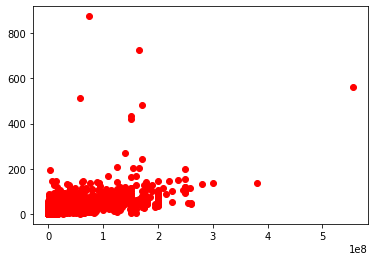

In [133]:
# Below, I will create 5 different visualizations of my data
budget_popularity = pd.read_sql("SELECT Title, SUM(budget), SUM(popularity) from movie_data_merged GROUP BY Title",engine)
print(budget_popularity)
plt.plot(budget_popularity['SUM(budget)'],budget_popularity['SUM(popularity)'],'ro')

2020-05-29 21:20:56,795 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT runtime, SUM(revenue) from movie_data_merged GROUP BY runtime")
2020-05-29 21:20:56,795 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:20:56,796 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT runtime, SUM(revenue) from movie_data_merged GROUP BY runtime")
2020-05-29 21:20:56,796 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:20:56,798 INFO sqlalchemy.engine.base.Engine SELECT runtime, SUM(revenue) from movie_data_merged GROUP BY runtime
2020-05-29 21:20:56,798 INFO sqlalchemy.engine.base.Engine ()


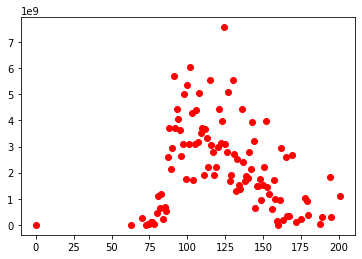

In [154]:
revenue_by_runtime = pd.read_sql("SELECT runtime, SUM(revenue) from movie_data_merged GROUP BY runtime",engine)
cleaned_revenue = [x for x in revenue_by_runtime['runtime'] if str(x) != 'nan']
plt.plot(revenue_by_runtime['runtime'],revenue_by_runtime['SUM(revenue)'],'ro')

2020-05-29 21:30:39,168 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT Year_X as year, AVG(vote_average) from movie_data_merged WHERE Year_X IS NOT NULL AND vote_average IS NOT NULL GROUP BY Year_X")
2020-05-29 21:30:39,169 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:30:39,170 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT Year_X as year, AVG(vote_average) from movie_data_merged WHERE Year_X IS NOT NULL AND vote_average IS NOT NULL GROUP BY Year_X")
2020-05-29 21:30:39,171 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:30:39,172 INFO sqlalchemy.engine.base.Engine SELECT Year_X as year, AVG(vote_average) from movie_data_merged WHERE Year_X IS NOT NULL AND vote_average IS NOT NULL GROUP BY Year_X
2020-05-29 21:30:39,173 INFO sqlalchemy.engine.base.Engine ()
      year  AVG(vote_average)
0   (1972)           8.400000
1   (1985)           8.000000
2   (1993)           8.300000
3   (1994)           8.000000
4   (1995)           8.100000
5  

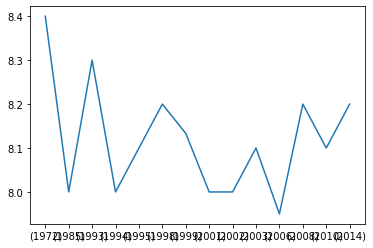

In [174]:
vote_avg_by_release_year = pd.read_sql("SELECT Year_X as year, AVG(vote_average) from movie_data_merged WHERE Year_X IS NOT NULL AND vote_average IS NOT NULL GROUP BY Year_X",engine)
#print(vote_avg_by_release_year)
plt.plot(vote_avg_by_release_year['year'],vote_avg_by_release_year['AVG(vote_average)'])

2020-05-29 21:35:01,470 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT Year_X as year, AVG(revenue_to_budget_percentage) from movie_data_merged WHERE Year_X IS NOT NULL AND revenue_to_budget_percentage IS NOT NULL GROUP BY Year_X")
2020-05-29 21:35:01,470 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:35:01,472 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT Year_X as year, AVG(revenue_to_budget_percentage) from movie_data_merged WHERE Year_X IS NOT NULL AND revenue_to_budget_percentage IS NOT NULL GROUP BY Year_X")
2020-05-29 21:35:01,472 INFO sqlalchemy.engine.base.Engine ()
2020-05-29 21:35:01,474 INFO sqlalchemy.engine.base.Engine SELECT Year_X as year, AVG(revenue_to_budget_percentage) from movie_data_merged WHERE Year_X IS NOT NULL AND revenue_to_budget_percentage IS NOT NULL GROUP BY Year_X
2020-05-29 21:35:01,474 INFO sqlalchemy.engine.base.Engine ()


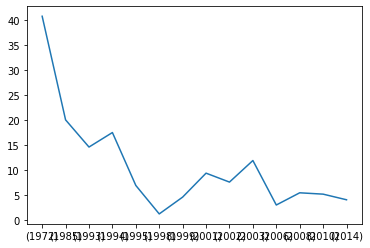

In [176]:
revenue_to_budget_by_release_year = pd.read_sql("SELECT Year_X as year, AVG(revenue_to_budget_percentage) from movie_data_merged WHERE Year_X IS NOT NULL AND revenue_to_budget_percentage IS NOT NULL GROUP BY Year_X",engine)
#print(vote_avg_by_release_year)
plt.plot(revenue_to_budget_by_release_year['year'],revenue_to_budget_by_release_year['AVG(revenue_to_budget_percentage)'])

2020-05-30 20:07:55,708 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("SELECT popularity, AVG('IMDB Rating') from movie_data_merged WHERE popularity IS NOT NULL AND 'IMDB Rating' IS NOT NULL GROUP BY popularity")
2020-05-30 20:07:55,709 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 20:07:55,710 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("SELECT popularity, AVG('IMDB Rating') from movie_data_merged WHERE popularity IS NOT NULL AND 'IMDB Rating' IS NOT NULL GROUP BY popularity")
2020-05-30 20:07:55,711 INFO sqlalchemy.engine.base.Engine ()
2020-05-30 20:07:55,712 INFO sqlalchemy.engine.base.Engine SELECT popularity, AVG('IMDB Rating') from movie_data_merged WHERE popularity IS NOT NULL AND 'IMDB Rating' IS NOT NULL GROUP BY popularity
2020-05-30 20:07:55,712 INFO sqlalchemy.engine.base.Engine ()


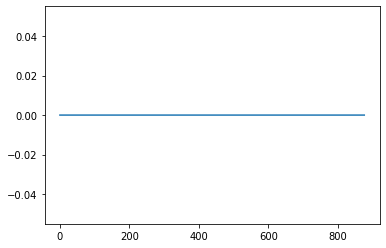

In [211]:
IMDB_score_by_popularity = pd.read_sql("SELECT popularity, AVG('IMDB Rating') from movie_data_merged WHERE popularity IS NOT NULL AND 'IMDB Rating' IS NOT NULL GROUP BY popularity",engine)
plt.plot(IMDB_score_by_popularity['popularity'],IMDB_score_by_popularity["AVG('IMDB Rating')"])